# Ai for Finance - Project 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing data
xls = pd.ExcelFile('Project_4.xlsx')
data = pd.read_excel(xls, 'creditscore_data')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
#Cleaning columns name
data.rename(columns = {'person_age':'Age', 'person_income':'Annual income','person_home_ownership':'Home ownership',
                      'person_emp_length':'Employment lenght','loan_intent':'Loan intent','loan_grade':'Loan grade',
                       'loan_amnt':'Loan amount','loan_int_rate':'Interest rate',
                      'loan_status':'Loan status','loan_percent_income':'Percent income',
                       'cb_person_default_on_file':'Historical default','cb_person_cred_hist_length':'Credit history length'},
                        inplace = True)
data

,Age,Annual income,Home ownership,Employment lenght,Loan intent,Loan grade,Loan amount,Interest rate,Loan status,Percent income,Historical default,Credit history length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
#print some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    32581 non-null  int64  
 1   Annual income          32581 non-null  int64  
 2   Home ownership         32581 non-null  object 
 3   Employment lenght      31686 non-null  float64
 4   Loan intent            32581 non-null  object 
 5   Loan grade             32581 non-null  object 
 6   Loan amount            32581 non-null  int64  
 7   Interest rate          29465 non-null  float64
 8   Loan status            32581 non-null  int64  
 9   Percent income         32581 non-null  float64
 10  Historical default     32581 non-null  object 
 11  Credit history length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
#print statistic description about the dataset
data.describe()

,Age,Annual income,Employment lenght,Loan amount,Interest rate,Loan status,Percent income,Credit history length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
#removing outliers , since we are talking about people and not corporations i will remove if age>100 and employment lenght>60
data = data[data['Age'] <= 100]
data = data[data['Employment lenght'] <= 60]

#removing null values
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

data.describe()

,Age,Annual income,Employment lenght,Loan amount,Interest rate,Loan status,Percent income,Credit history length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
#binarize historical default
data['Historical default'] = data['Historical default'].map(lambda x: 0 if x=='N' else 1)
data

,Age,Annual income,Home ownership,Employment lenght,Loan intent,Loan grade,Loan amount,Interest rate,Loan status,Percent income,Historical default,Credit history length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28627,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
28628,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
28629,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
28630,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


In [8]:
#One hot encoding the categorical features
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

categorical_features = ['Home ownership', 'Loan intent', 'Loan grade']

In [9]:
for category in categorical_features:

    #encoding the categorical features
    onehot = ohe.fit_transform(data[[category]])

    #adding the one-hot columns to the data frame
    for i, cat in zip(range(len(ohe.categories_[0])), ohe.categories_[0]):
        data[category + ' ' + str(cat)] = [column[i] for column in onehot]
        
#dropping the columns
data.drop(columns=categorical_features, axis=1, inplace=True)
data

,Age,Annual income,Employment lenght,Loan amount,Interest rate,Loan status,Percent income,Historical default,Credit history length,Home ownership MORTGAGE,...,Loan intent MEDICAL,Loan intent PERSONAL,Loan intent VENTURE,Loan grade A,Loan grade B,Loan grade C,Loan grade D,Loan grade E,Loan grade F,Loan grade G
0,21,9600,5.0,1000,11.14,0,0.10,0,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,25,9600,1.0,5500,12.87,1,0.57,0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,23,65500,4.0,35000,15.23,1,0.53,0,2,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,24,54400,8.0,35000,14.27,1,0.55,1,4,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21,9900,2.0,2500,7.14,1,0.25,0,2,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28627,57,53000,1.0,5800,13.16,0,0.11,0,30,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28628,54,120000,4.0,17625,7.49,0,0.15,0,19,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28629,65,76000,3.0,35000,10.99,1,0.46,0,28,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28630,56,150000,5.0,15000,11.48,0,0.10,0,26,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


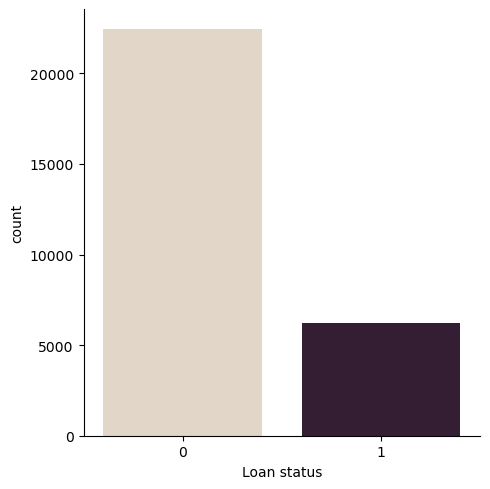

In [10]:
#plotting loan count
sns.catplot(data=data, x="Loan status", kind="count", palette="ch:.25")

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = data.copy()
normalized_data.drop(['Loan status'], axis=1, inplace=True)

for column in normalized_data.columns[:9]:
    normalized_data[column] = scaler.fit_transform(data[column].array.reshape(-1,1))

normalized_data

,Age,Annual income,Employment lenght,Loan amount,Interest rate,Percent income,Historical default,Credit history length,Home ownership MORTGAGE,Home ownership OTHER,...,Loan intent MEDICAL,Loan intent PERSONAL,Loan intent VENTURE,Loan grade A,Loan grade B,Loan grade C,Loan grade D,Loan grade E,Loan grade F,Loan grade G
0,0.015625,0.002751,0.121951,0.014493,0.321348,0.120482,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.078125,0.002751,0.024390,0.144928,0.418539,0.686747,0.0,0.035714,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.046875,0.030209,0.097561,1.000000,0.551124,0.638554,0.0,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.062500,0.024757,0.195122,1.000000,0.497191,0.662651,1.0,0.071429,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.015625,0.002898,0.048780,0.057971,0.096629,0.301205,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28627,0.578125,0.024069,0.024390,0.153623,0.434831,0.132530,0.0,1.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28628,0.531250,0.056981,0.097561,0.496377,0.116292,0.180723,0.0,0.607143,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28629,0.703125,0.035367,0.073171,1.000000,0.312921,0.554217,0.0,0.928571,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28630,0.562500,0.071717,0.121951,0.420290,0.340449,0.120482,0.0,0.857143,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


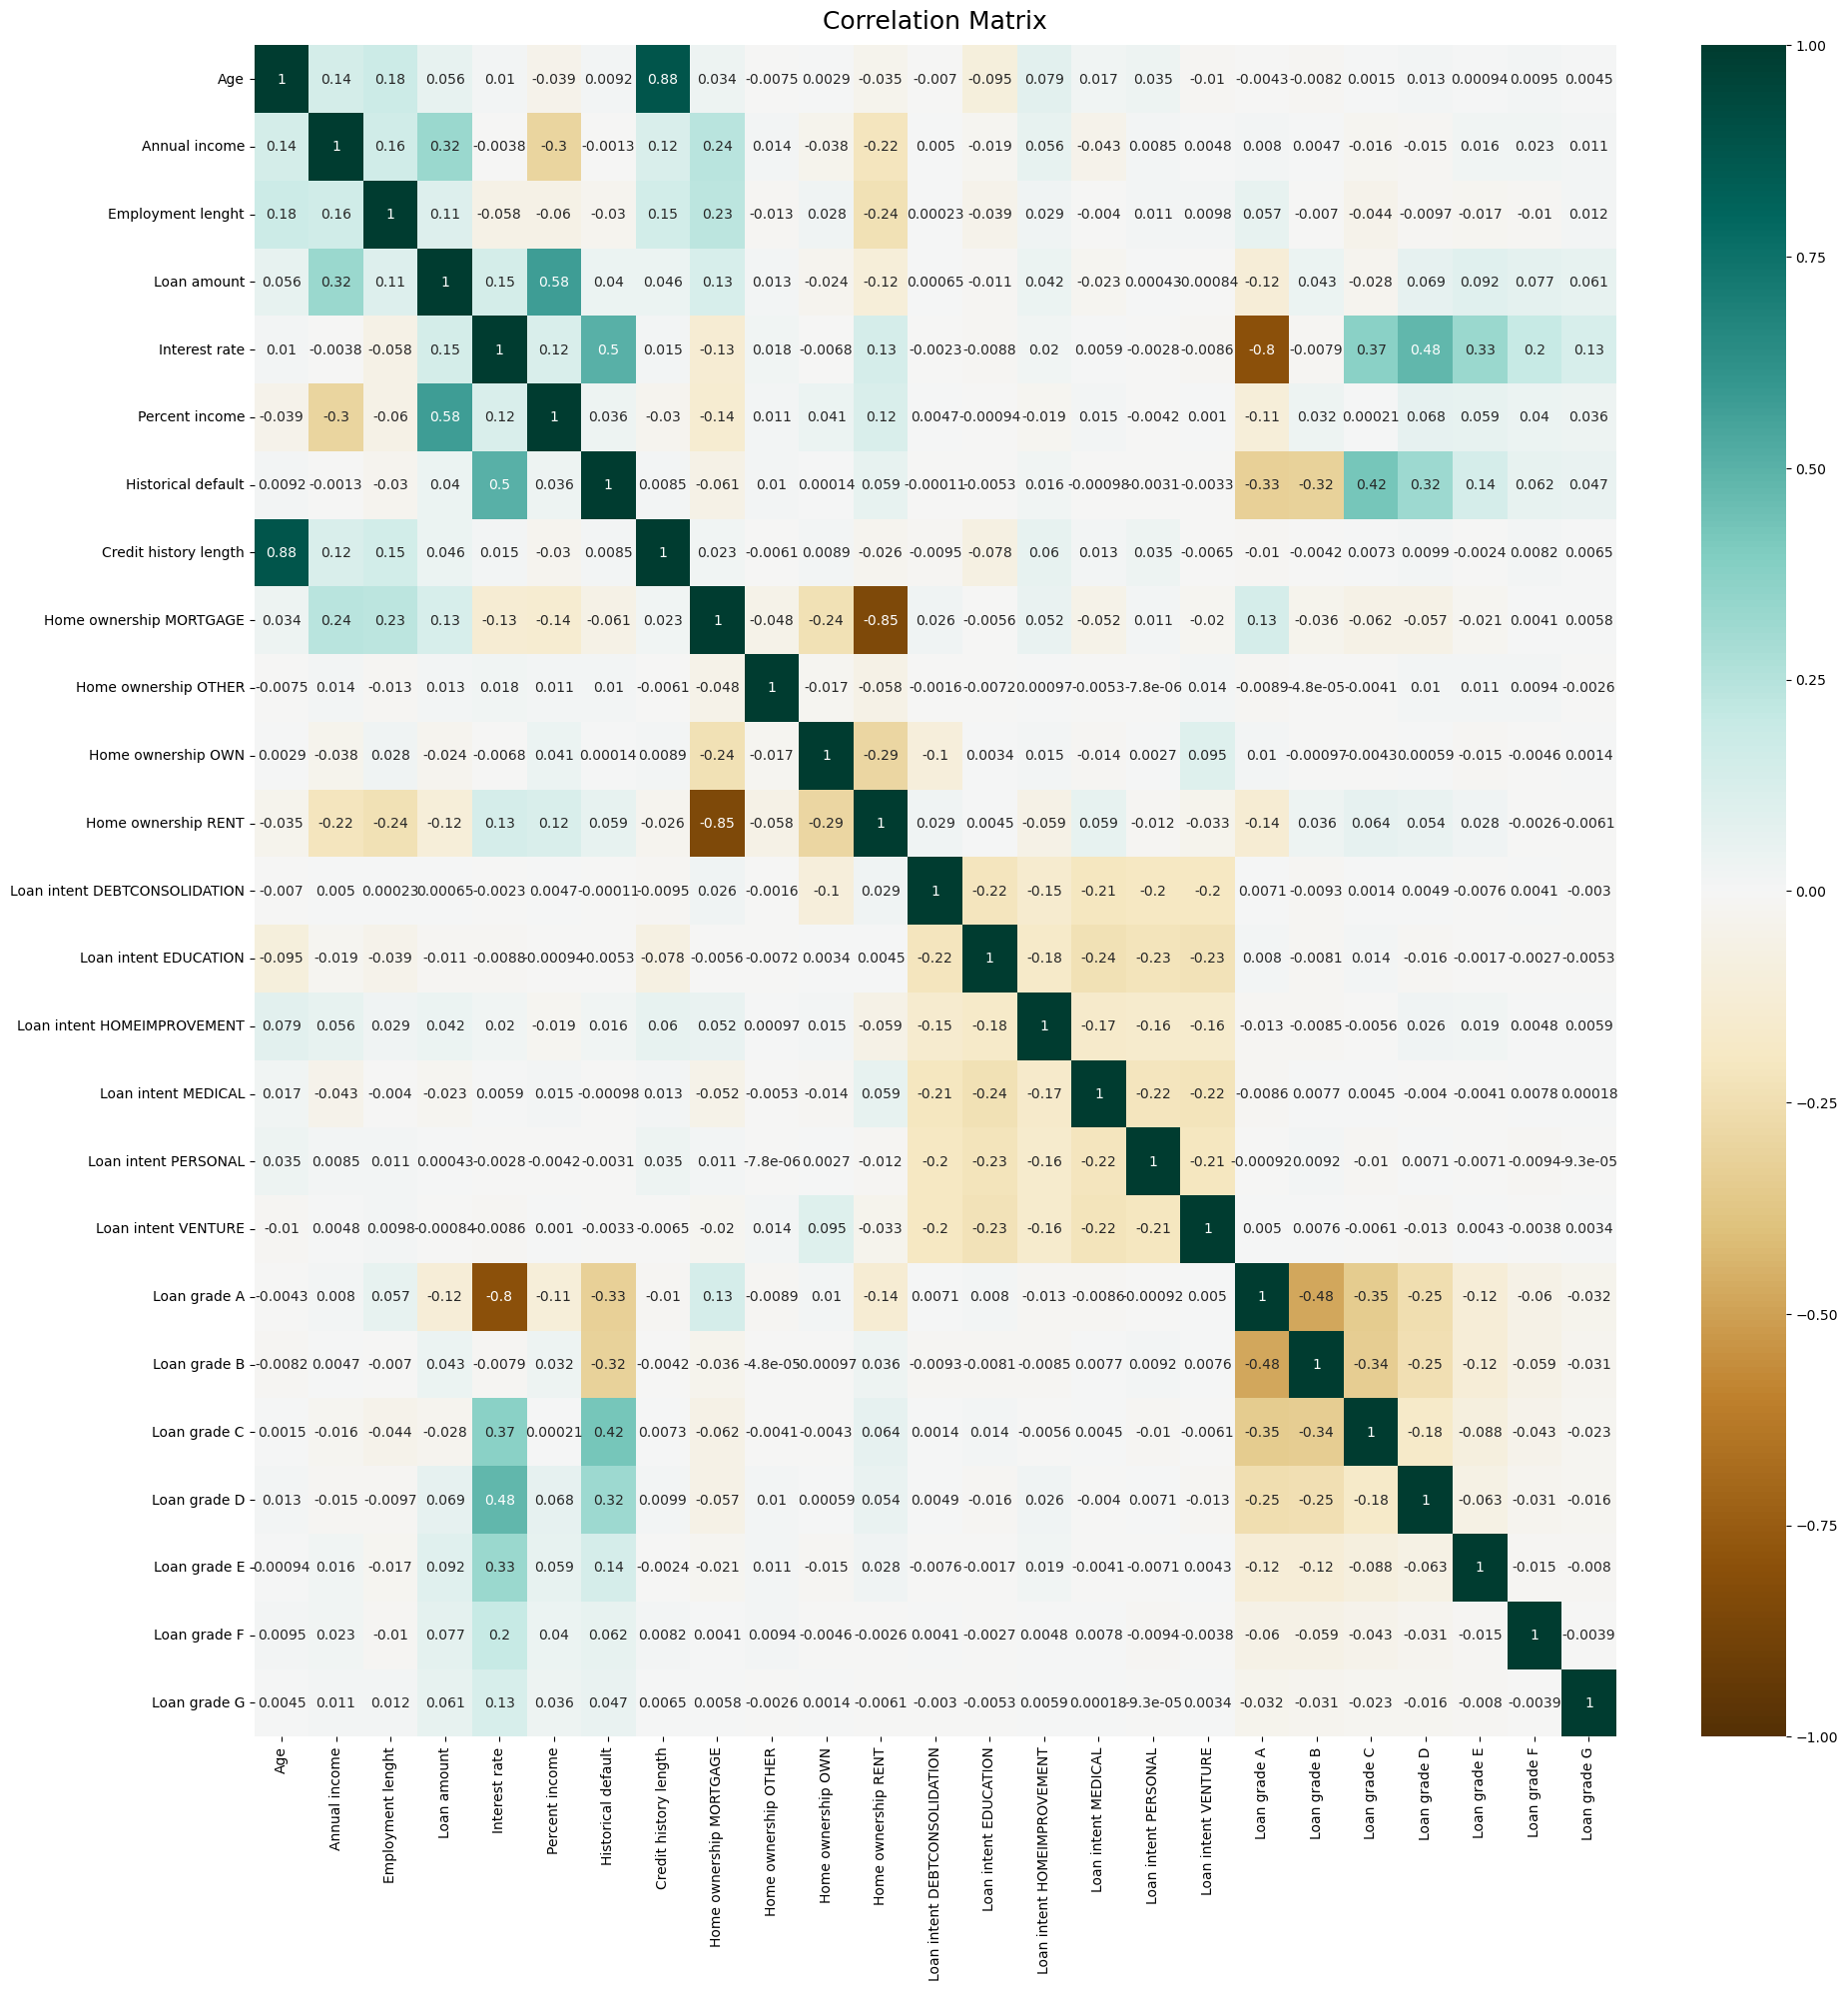

In [12]:
plt.figure(figsize=(22, 22))
heatmap = sns.heatmap(normalized_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12);
plt.show()

In [13]:
#dropping multicollinear variables ( age, loan_grade, )
normalized_data.drop(['Age','Loan grade A','Loan grade B','Loan grade C','Loan grade D','Loan grade E','Loan grade F','Loan grade G'],
          axis=1, inplace=True)
normalized_data

,Annual income,Employment lenght,Loan amount,Interest rate,Percent income,Historical default,Credit history length,Home ownership MORTGAGE,Home ownership OTHER,Home ownership OWN,Home ownership RENT,Loan intent DEBTCONSOLIDATION,Loan intent EDUCATION,Loan intent HOMEIMPROVEMENT,Loan intent MEDICAL,Loan intent PERSONAL,Loan intent VENTURE
0,0.002751,0.121951,0.014493,0.321348,0.120482,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002751,0.024390,0.144928,0.418539,0.686747,0.0,0.035714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.030209,0.097561,1.000000,0.551124,0.638554,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.024757,0.195122,1.000000,0.497191,0.662651,1.0,0.071429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.002898,0.048780,0.057971,0.096629,0.301205,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28627,0.024069,0.024390,0.153623,0.434831,0.132530,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28628,0.056981,0.097561,0.496377,0.116292,0.180723,0.0,0.607143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28629,0.035367,0.073171,1.000000,0.312921,0.554217,0.0,0.928571,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
28630,0.071717,0.121951,0.420290,0.340449,0.120482,0.0,0.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Predicting models

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

#Saving the dependent and independent variables
X = normalized_data
y = data['Loan status']

#splitting the data in training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True);

Optimal number of features: 16


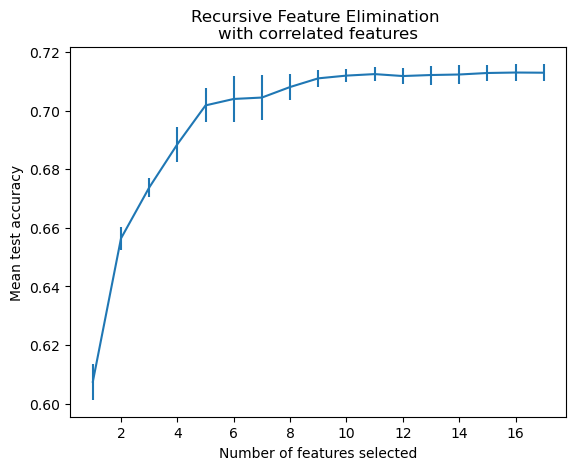

In [15]:
#Feature selection with Recursive Feature Elimination
min_features = 1
rfecv = RFECV(estimator=LogisticRegression(),
              cv=StratifiedKFold(5),
              scoring="balanced_accuracy",
              min_features_to_select=min_features, 
              n_jobs=-1)

rfecv.fit(X_train, Y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features, n_scores + min_features),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [16]:
def Run_Model(model, display_confusion_matrix=True, display_feature_selection=True):

    #training the classifier
    classifier = model
    y_pred = classifier.fit(X_train, Y_train).predict(X_test)

    #evaluate the classifier
    accuracy = accuracy_score(Y_test, y_pred)
    bal_accuracy = balanced_accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    
    print(f'Accuracy: {accuracy}\nBalanced accuracy: {bal_accuracy}\nF1-score: {f1}')
    
    #display confusion matrix for binary classification
    if(display_confusion_matrix == True):
        cm = confusion_matrix(Y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non Default', 'Default'])
        
        cm_display.plot()
        plt.show()

    #evaluate and display feature importance
    if(display_feature_selection == True):
            
        #feature ranking with one-vs-rest cross validation
        n_features = len(X.columns)
        scores_list = []
        for i in range(n_features):
            X_one = pd.DataFrame(X_train.iloc[:,i])
            scores = cross_val_score(classifier, X_one, Y_train, cv=5)
            scores_list.append((X.columns.values[i],scores.mean()))

        #display feature ranking
        score_df = pd.DataFrame(scores_list)
        score_df.columns=['Feature','Score']
        score_df = score_df.sort_values(by=['Score'], ascending=False)
        sns.barplot(data=score_df, x="Score", y="Feature")

### Dummy classifier (Baseline)

Accuracy: 0.7817229336437719
Balanced accuracy: 0.5
F1-score: 0.0


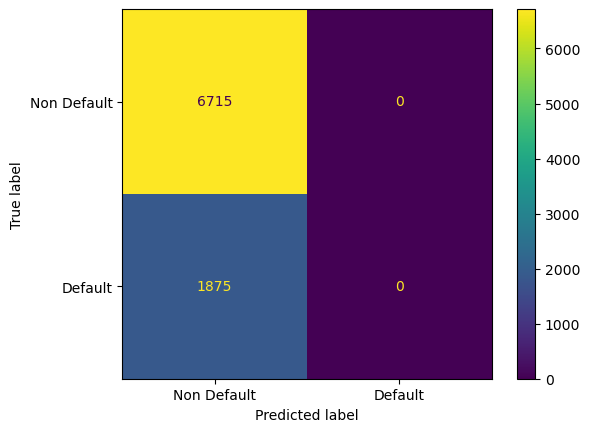

In [17]:
#the baseline always predict the most probable class, we have to do better than this
from sklearn.dummy import DummyClassifier

classifier = DummyClassifier(strategy='most_frequent', random_state=42)
Run_Model(classifier, display_confusion_matrix=True, display_feature_selection=False)

### Logistic regression

In [18]:
#tuning hyperparameters with GridSearchCV
classifier = LogisticRegression()
parameters = {'penalty':('l1', 'l2'), 'C':[0.1, 1.0, 10.0], 'solver':['liblinear','saga'], 'max_iter':[1000]}

clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'C': 10.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy: 0.8469150174621654
Balanced accuracy: 0.7110316207495657
F1-score: 0.5726356841078973


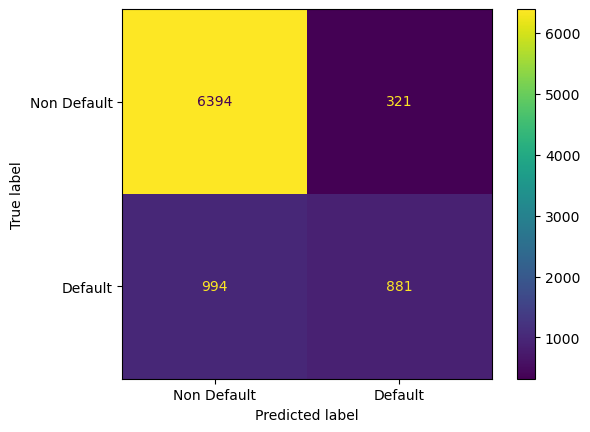

In [19]:
Run_Model(clf.best_estimator_ ,display_confusion_matrix=True, display_feature_selection=False)

### MultiLayer Perceptron (MLP)

In [21]:
from sklearn.neural_network import MLPClassifier

#tuning hyperparameters with GridSearchCV
classifier = MLPClassifier()
parameters = {'hidden_layer_sizes':[(30,30,20)], 'max_iter':[500]}

clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'hidden_layer_sizes': (30, 30, 20), 'max_iter': 500}


Accuracy: 0.8982537834691502
Balanced accuracy: 0.8146005460412014
F1-score: 0.7408066429418743


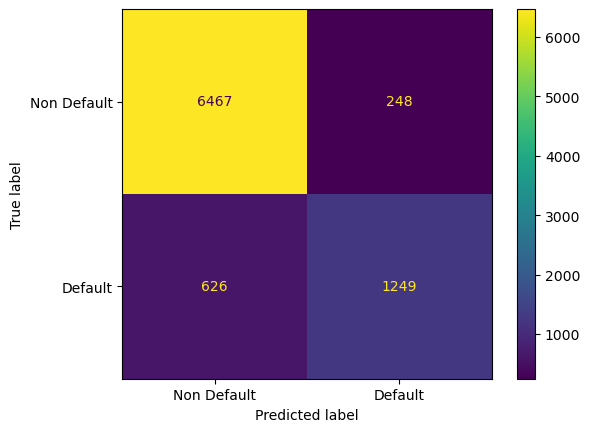

In [22]:
Run_Model(clf.best_estimator_, display_confusion_matrix=True, display_feature_selection=False)

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

#tuning hyperparameters with GridSearchCV
classifier = RandomForestClassifier()
parameters = {'n_estimators':[100,200],
              'criterion':['gini', 'entropy'],
              'max_depth':[10,None],
             'min_samples_split':[2,10]}

clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


Accuracy: 0.919674039580908
Balanced accuracy: 0.8354128567882849
F1-score: 0.7884733292458613


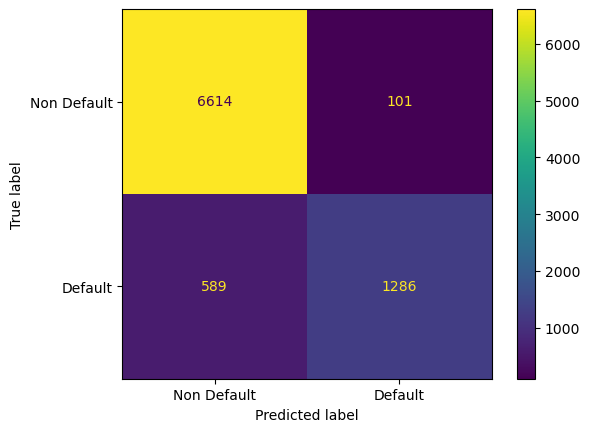

In [24]:
Run_Model(clf.best_estimator_, display_confusion_matrix=True, display_feature_selection=False)

### Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC

#tuning hyperparameters with GridSearchCV
classifier = SVC()
parameters = {'C':[0.1, 1.0, 10.0],
              'kernel':['linear', 'poly', 'rbf'],
              'degree':[2, 3]}

clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'C': 10.0, 'degree': 3, 'kernel': 'poly'}


Accuracy: 0.8891734575087311
Balanced accuracy: 0.7782318193100025
F1-score: 0.6960408684546616


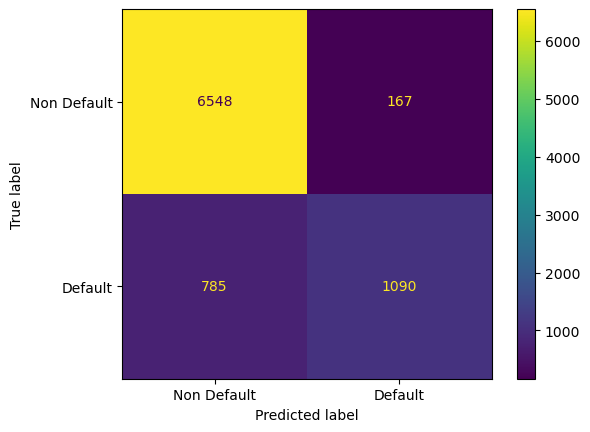

In [26]:
Run_Model(clf.best_estimator_, display_confusion_matrix=True, display_feature_selection=False)

## Feature ranking for the best model

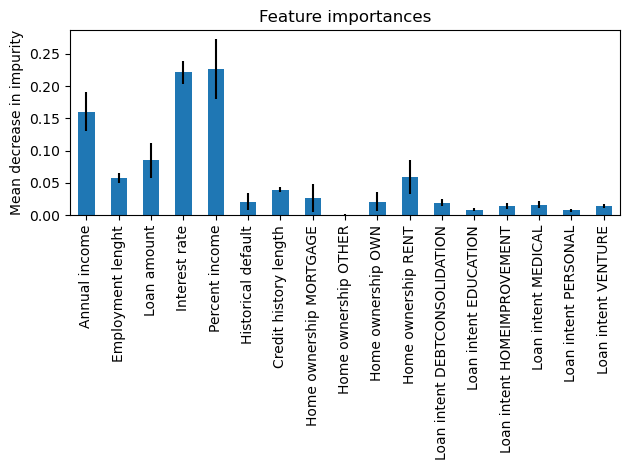

In [27]:
best_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, random_state=42)
y_score = best_classifier.fit(X_train, Y_train).predict(X_test)

importances = best_classifier.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
std = np.std([tree.feature_importances_ for tree in best_classifier.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()